
8-Puzzle Solution:


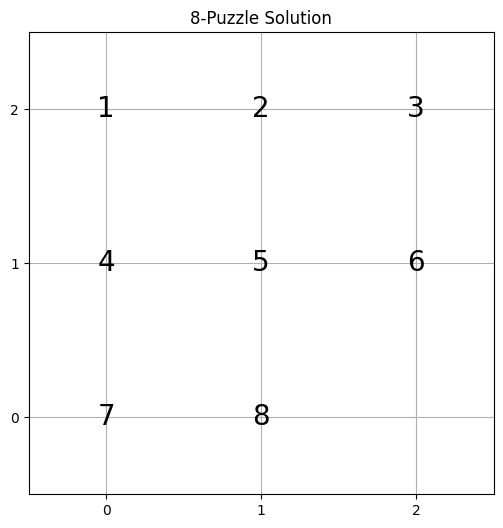


N-Queens Solution:


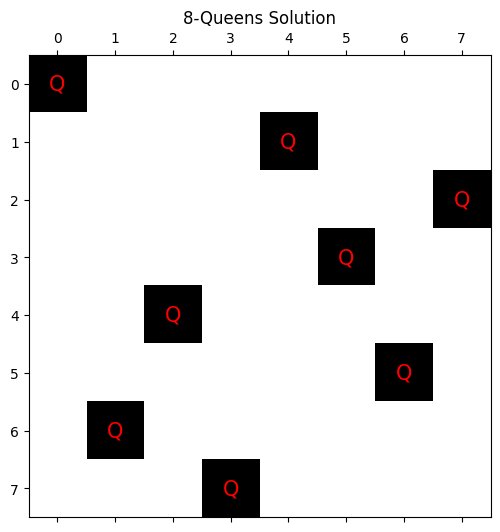


Sudoku Solution:


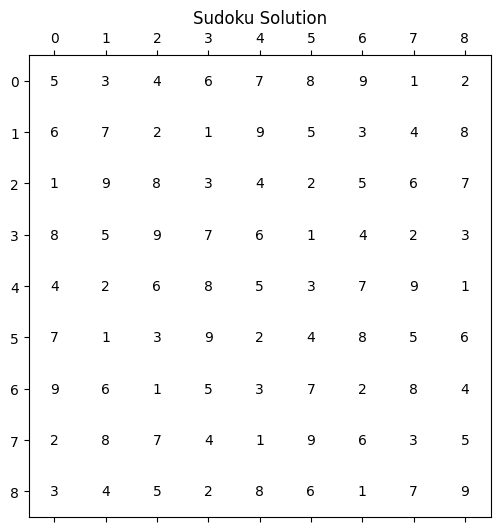

In [4]:
import matplotlib.pyplot as plt
import numpy as np


class Puzzle:
    """Abstract base class for puzzles."""

    def get_initial_state(self):
        raise NotImplementedError

    def is_goal_state(self, state):
        raise NotImplementedError

    def get_successors(self, state):
        raise NotImplementedError

    def visualize(self, state):
        raise NotImplementedError


class EightPuzzle(Puzzle):
    """8-Puzzle Solver with Visualization."""

    def __init__(self, initial_state):
        self.initial_state = initial_state
        self.goal_state = [
            [1, 2, 3],
            [4, 5, 6],
            [7, 8, 0],  # 0 represents the blank space
        ]

    def get_initial_state(self):
        return self.initial_state

    def is_goal_state(self, state):
        return state == self.goal_state

    def get_successors(self, state):
        def swap(state, i1, j1, i2, j2):
            new_state = [row[:] for row in state]
            new_state[i1][j1], new_state[i2][j2] = new_state[i2][j2], new_state[i1][j1]
            return new_state

        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        successors = []

        # Find the blank space (0)
        for i in range(3):
            for j in range(3):
                if state[i][j] == 0:
                    blank_pos = (i, j)

        # Generate successors by moving the blank space
        for di, dj in directions:
            ni, nj = blank_pos[0] + di, blank_pos[1] + dj
            if 0 <= ni < 3 and 0 <= nj < 3:
                successors.append(swap(state, blank_pos[0], blank_pos[1], ni, nj))

        return successors

    def visualize(self, state):
        """Visualize the 8-Puzzle grid."""
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_xlim(-0.5, 2.5)
        ax.set_ylim(-0.5, 2.5)
        ax.set_xticks(range(3))
        ax.set_yticks(range(3))
        ax.grid(True)

        for i in range(3):
            for j in range(3):
                if state[i][j] != 0:
                    ax.text(j, 2 - i, state[i][j], fontsize=20, ha="center", va="center")

        plt.title("8-Puzzle Solution")
        plt.show()


class NQueens(Puzzle):
    """N-Queens Solver with Visualization."""

    def __init__(self, n):
        self.n = n
        self.solution = []

    def get_initial_state(self):
        return []

    def is_goal_state(self, state):
        return len(state) == self.n

    def get_successors(self, state):
        if len(state) >= self.n:
            return []

        successors = []
        row = len(state)
        for col in range(self.n):
            if self.is_safe(state, row, col):
                successors.append(state + [col])
        return successors

    def is_safe(self, state, row, col):
        for r, c in enumerate(state):
            if c == col or abs(c - col) == abs(r - row):
                return False
        return True

    def visualize(self, state):
        """Visualize the N-Queens board."""
        board = np.zeros((self.n, self.n))
        for r, c in enumerate(state):
            board[r, c] = 1

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.matshow(board, cmap="binary")
        for r in range(self.n):
            for c in range(self.n):
                if board[r, c] == 1:
                    ax.text(c, r, "Q", ha="center", va="center", fontsize=15, color="red")

        plt.title(f"{self.n}-Queens Solution")
        plt.show()


class Sudoku(Puzzle):
    """Sudoku Solver with Visualization."""

    def __init__(self, initial_state):
        self.initial_state = initial_state

    def get_initial_state(self):
        return self.initial_state

    def is_goal_state(self, state):
        return all(0 not in row for row in state)

    def get_successors(self, state):
        def is_valid(board, r, c, num):
            for i in range(9):
                if board[r][i] == num or board[i][c] == num:
                    return False

            sr, sc = 3 * (r // 3), 3 * (c // 3)
            for i in range(sr, sr + 3):
                for j in range(sc, sc + 3):
                    if board[i][j] == num:
                        return False
            return True

        for r in range(9):
            for c in range(9):
                if state[r][c] == 0:
                    for num in range(1, 10):
                        if is_valid(state, r, c, num):
                            new_state = [row[:] for row in state]
                            new_state[r][c] = num
                            yield new_state
                    return

    def visualize(self, state):
        """Visualize the Sudoku board."""
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.matshow([[1 if num else 0 for num in row] for row in state], cmap="binary")
        for i in range(9):
            for j in range(9):
                if state[i][j] != 0:
                    ax.text(j, i, state[i][j], ha="center", va="center", fontsize=10)

        plt.title("Sudoku Solution")
        plt.show()


def solve_puzzle(puzzle):
    """Solve a puzzle using BFS."""
    from collections import deque

    initial_state = puzzle.get_initial_state()
    queue = deque([initial_state])
    visited = set()

    while queue:
        state = queue.popleft()
        if puzzle.is_goal_state(state):
            return state

        visited.add(str(state))
        for successor in puzzle.get_successors(state):
            if str(successor) not in visited:
                queue.append(successor)

    return None


if __name__ == "__main__":
    # Solve 8-Puzzle
    initial_8puzzle = [
        [1, 2, 3],
        [4, 0, 5],
        [7, 8, 6],
    ]
    print("\n8-Puzzle Solution:")
    eight_puzzle = EightPuzzle(initial_8puzzle)
    solution = solve_puzzle(eight_puzzle)
    if solution:
        eight_puzzle.visualize(solution)
    else:
        print("No solution found!")

    # Solve N-Queens
    print("\nN-Queens Solution:")
    n = 8
    n_queens = NQueens(n)
    solution = solve_puzzle(n_queens)
    if solution:
        n_queens.visualize(solution)

    # Solve Sudoku
    print("\nSudoku Solution:")
    initial_sudoku = [
        [5, 3, 0, 0, 7, 0, 0, 0, 0],
        [6, 0, 0, 1, 9, 5, 0, 0, 0],
        [0, 9, 8, 0, 0, 0, 0, 6, 0],
        [8, 0, 0, 0, 6, 0, 0, 0, 3],
        [4, 0, 0, 8, 0, 3, 0, 0, 1],
        [7, 0, 0, 0, 2, 0, 0, 0, 6],
        [0, 6, 0, 0, 0, 0, 2, 8, 0],
        [0, 0, 0, 4, 1, 9, 0, 0, 5],
        [0, 0, 0, 0, 8, 0, 0, 7, 9],
    ]
    sudoku = Sudoku(initial_sudoku)
    solution = solve_puzzle(sudoku)
    if solution:
        sudoku.visualize(solution)
    else:
        print("No solution found!")
